In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.utils import shuffle


infilen = open("neg_pos_rev.xml","r")
contents = infilen.read()
soup = BeautifulSoup(contents,'xml')

#print(soup.prettify())
ratings = soup.find_all('rating')
rev_txt = soup.find_all('review_text')
titles= soup.find_all('title')
print(len(ratings))
print(len(rev_txt))
print(len(titles))

2000
2000
2000


In [2]:
stopwords=[]
for word in open('stopword_short_long.txt'):
    #print(word)
    stopwords.append(word.replace('\n',''))
#print(stopwords)

In [3]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
rating_=[]
rev_txt_=[]
title_=[]

def txt_check(text):
    for ch in ['\\','`','\"','*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']:
        if ch in text:
            text=text.replace(ch," ")
    return text    

def stopword_drop(text):
    txt=[]
    for i in text:
        if i in stopwords:
            pass
        else:
            txt.append(i)            
    return txt


def txt_drop(text):
    txt=[]
    for i in text:
        if len(i)>2:
            txt.append(i)
        
    return txt        

txt_g=[]
txt_i=[]
txt_ii=[]
for i in range(0,len(ratings)):   #len(ratings)
    #print(ratings[i].get_text())

    txt1=txt_check(rev_txt[i].get_text()).lower().replace('\n'," ").strip().split(" ")
    txt2=txt_drop(txt1)
    txt3=stopword_drop(txt2)
    txt4=list(set(txt3)) #remove repetition from sentence list txt3
    txt_i.append(txt3)     #txt_i has double/triple ... count good for raw count
    txt_ii.append(txt4)   #txt_ii has no double count good for binary
    txt_g.extend(txt4)

    
#print(len(txt_i))    
#print(len(txt_g))
txt_gf_n=list(set(txt_g))
print(len(txt_gf_n)) 




10158


In [4]:
#aList = [123, 'xyz', 'zara', 'abc', 123];
#print "Count for 123 : ", aList.count(123)
#print "Count for zara : ", aList.count('zara')
count_word=np.zeros((len(ratings),len(txt_gf_n)))
count_word2=np.zeros((len(ratings),len(txt_gf_n)))
for i in range(0,len(ratings)):
    for j in range(len(txt_gf_n)):
        count_word[i,j]=txt_i[i].count(txt_gf_n[j])     #based on raw count
        count_word2[i,j]=txt_ii[i].count(txt_gf_n[j])   #based on binary

print(np.max(count_word))
print(np.max(count_word2))
txt_gf_n[6510]

20.0
1.0


'raises'

In [5]:
print(np.shape(count_word))

(2000, 10158)


In [12]:
N=2000
D=len(txt_gf_n)
ones=np.array([[1]*N]).T
Y=np.random.randn(N)
Y[:1000]=0
Y[1000:]=1

X1=count_word
X2=count_word2
X=count_word2   #binary

X,Y=shuffle(X,Y)

Xtrain=np.random.randn(1400,D)
Xtest=np.random.randn(600,D)


Xtrain=X[:-600,:]
Ytrain=Y[:-600]

Xtest=X[-600:,:]
Ytest=Y[-600:]

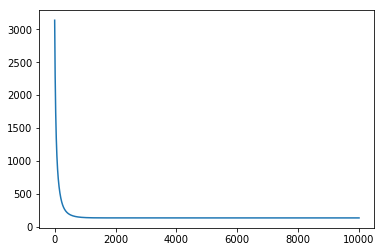

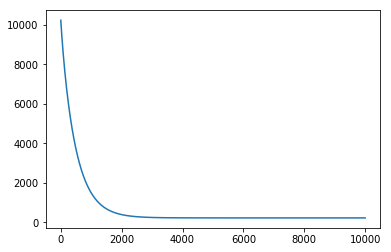

In [14]:
w=(np.random.randn(D))

Xn=Xtrain
T_target=Ytrain

z=np.dot(Xn,w)

epsilon=1e-10
iteration=10000
wbackup=w
w_mag=[]
j_cost=[]

def sigmoid(z):
    return 1/(1+np.exp(-z))


alpha=0.001    # learning rate
lambda_=1

Y_n=sigmoid(z)

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)

for time in range(iteration):

    derivative=np.dot(Xn.T,(T_target-Y_n))-lambda_*w            #keep the weights from overgrowing to make maximum liklihood maximum
    w=w+alpha*derivative                              #using lambda*w make maximum posterior not liklihood -lambda*w make the convergance faster
    Y_n=sigmoid(np.dot(Xn,w))

  
    if (time%1==0):

        j_cost.append(cross_entropy_err(Y_n,T_target))
        w_mag.append(np.dot(w.T,w))

#print('lambda =0.0, w,time,J',w,time,cross_entropy_err(Y_n,T_target))
plt.plot(j_cost,label='lambda= 0.0')
plt.show()
plt.plot(w_mag,label='w_mag')
plt.show()


In [15]:
for i in range(len(txt_gf_n)):
    print(w[i],txt_gf_n[i])
    
print('Classificatio rate:', 1-np.abs(T_target-np.round(Y_n)).sum()/1400)

-4.051020458383214e-05 grrr
3.170105914713734e-05 coverings
0.002818106701406231 advances
-0.036579742424742274 inform
-0.053510892105777454 array
-0.054431707795062415 casette
-0.0019901220781457347 disabling
-0.06690955200578731 filed
-0.10732586866941221 simplicity
-0.18144408414135185 mute
-0.0995690532646387 initial
0.04761135174360594 toddler
-0.2995716394765945 connecting
-0.410948189720216 charge
-0.24058403134835776 realize
1.0922558018926944e-05 chatting
0.023666002540720266 discernable
0.07111539379324769 otoscope
0.05313278361033379 accompany
-0.11326736084270977 dna
-0.04047822905253394 undisclosed
-0.04144915985684315 exceptions
-0.04355312131756472 browser
-0.3163240912300311 existent
-3.021880578751978e-05 sunrocket
0.14390621942830206 tad
0.1263140224394314 adems
0.3520150026574511 devices
0.03220644016941836 viewsonic's
-3.156756163078237e-05 straws
0.12060366894868618 generous
-0.2708135486750153 microsoft
-0.06436561542903531 photo
-0.1150522866626154 rubber
-0.0976

0.07228297266797801 fraction
0.015410507493291875 whizzing
-0.25877223294027546 jogging
-0.11130239134808247 alledged
-5.952943280485059e-05 kong
-0.046634805801067825 ata
0.01688588310015779 ipod
-0.004905011378460479 buggy
-0.09561267412611761 minus
-0.008135285846328081 gag
0.3726212487535722 wrist
-0.04667836827307698 referring
-0.042619690769222646 definite
-0.03855302129145124 nov
-0.06739194204947072 parts
0.13458398056745358 transit
-0.08835730226763411 eject
-0.06668541192262563 toothpick
-6.031876781041081e-05 stereofield
0.11525934426706529 born
-0.012509837113651086 anycom
0.03846091457884795 wardriving
-0.10361848706308996 amazo
-0.02327805196121041 mixing
0.03668684645123643 elegï¿½
0.040235059684449466 shipping
0.059091344380297 mignon
0.0022341286824557873 marketplace
0.29689729457710634 f'n
-0.11326176530483491 jointed
8.018826033148624e-06 ambiant
0.0505669221539806 webcams
0.031057888176424468 real
-0.03489880652608004 reporting
-0.007430254080521415 rubbish
0.005457

-0.0981672499847078 pull
-0.0468848571429218 attenuation
-0.18298342975263457 draws
-0.04974237917382663 safety
1.233646171467147e-05 wary
-0.1042300374172004 cyberhome
0.04257850644781994 dvpnss
-1.33665856835063e-06 seasons
0.08192671543977167 hospital
-0.0016371064343436363 deducted
1.023007680904669 awesome
-0.2538224405001227 import
-0.2399249092050536 ten
-0.0610259142791506 seemingly
0.005428385873220515 draining
-0.003589842376192511 'n'
-5.120943735537726e-05 undoubtedly
0.04772951708170731 erased
0.08029683906120898 technically
-0.05401142951791362 destined
-0.019164321809922856 rats
0.0250481605129566 drone
-0.008636592652081882 inflexible
-0.11569361525706004 mopre
-0.2656674016677184 hangs
-6.703186530967498e-06 valley
1.574018774237297e-05 mechanics
-0.45720288846871976 credited
-0.0005816464650969565 unsympathetic
-0.06664546650645393 stripped
0.2994265841480084 negatives
0.01551504742730255 announcing
-0.1561681782086658 album
-0.0996208827785663 cubicles
0.020869782275

-0.04533282127423217 atrocious
-0.18145525634681509 antenna
-0.07636615394732903 dimly
-0.09992840921175283 principle
-0.13442893365445602 belt
3.8931324913878196e-05 retype
0.06592756460769222 unscrambled
-0.19117226375793273 truck
-0.33195207340852323 heck
-0.10729943205180843 card's
-0.018929663690300625 transmitters
-0.03345424171689016 isolation
0.11564466550216736 clips
0.030596082274977524 demention
-0.008198826725643368 freaks
-0.029504690413152138 tasks
9.943473561870227e-06 wpn
-0.04016897912624709 agreement
-0.2897955200892062 keys
-0.2300963704706863 husband
0.05043700300653599 catalog
-0.133162315378974 zipper
0.008043489012175583 esi
-0.07460051266252639 volumn
-5.483752018851256e-06 innovative
-1.06811792611749e-05 compacts
-0.0068314412723519315 throughput
-0.11687928431128287 restore
-0.06860870652604974 targus
0.14937454492896962 acts
0.05154195643851727 exploring
0.2585905510321574 wired
-0.11970492597106211 thoughts
4.1736706688677745e-05 namebrand
0.096307814997509

0.03787048003621975 operating
0.04782580535962024 phonetools
-0.051516672719981324 partially
0.16744556580285708 changin
-0.017766448648064335 laughing
2.5957873180550037e-05 ridicolous
-0.02077229667533128 regrettably
-0.0896240809069197 rules
0.00014557389307603475 downtown
0.01771802795723278 ssmf
0.016139874660891545 characteristices
-0.03943121808305376 mailing
0.056033304645175856 switches
-1.1481672481497042e-05 joe
0.16869217050155047 tvs
-0.04858380146216828 slowed
0.06714672435294138 moneys
4.258503074040167e-05 hacerse
-4.5798113212203095e-06 snuggly
5.336697201577609e-05 shutter
-5.2189549453674444e-05 imported
0.021523471928412148 intall
0.005450453120801407 pleasing
0.038447153837352165 browse
-0.20119518212590767 forever
0.14041252756846562 mounted
0.06006302598361611 jukebox
-0.17538741279536468 promoted
0.04708107221618769 tryed
2.4968727541044112e-05 fiddle
-0.14746798119310447 riding
-2.4525191434085014e-05 importing
-0.07312932114982464 decreased
-0.1847326909750276

0.12749157985680415 machines
0.17308697243181406 badly
-2.938008533295578e-05 'around'
0.2619532200353484 muc
0.02446960206793671 saver
4.084236844383284e-05 motorala
-0.2085447893566489 wider
0.2527472628383262 viable
0.0023584426964130046 coil
-3.478642157110615e-05 talent
0.14536328094470122 field
0.06511770956379652 excess
0.22526691891073977 protector
5.307139676329176e-06 certificate
-0.08821771320574714 interfaces
-0.18124603796206654 everytime
-0.02363205979237495 bacl
0.07837257879358836 stiched
-2.6058109727554103e-05 beef
-0.12016724714698276 directions
0.18346750431306152 hanging
-0.005123155420257799 netcom
-4.350355393138282e-05 dope
-0.035099666722977464 doorstop
0.009677850944001923 sharpen
0.16315891455447415 pause
-0.3868816938936725 sending
0.03061510038603592 celeron
-0.19498216592450462 dropouts
-5.82442964630268e-05 unrelated
8.087696007350736e-05 bout
-0.047360475721927954 lead
0.20656377490869396 car
0.11005602292056296 folders
0.10744315957579632 bothered
-9.13

0.0001338875368710497 hood
-0.005281582877865377 cabo
5.161066877880666e-05 sanso
-7.521209173948223e-05 grounded
0.14386326847972475 levels
0.06303597656420143 workday
5.6161302669505554e-05 intially
-0.10027017773140631 instructions
0.03259481167092507 sturdier
-0.05702032683886967 wallpapers
-0.0009533622295273764 stutters
-0.017876649215188938 stabilized
0.2026692565699591 america
0.010330723887330985 competitors
-0.038509595215924446 anticipated
1.52723773972533e-05 hastle
6.452722321977363e-05 vie
0.0037216881281989097 yea
0.04381557944183747 insane
-1.309379545013266e-05 uglier
-0.015608189495075918 cluster
-0.1017635771498396 bangkok
-3.800155631236454e-05 cantata
-0.07265976777479259 	satellites
0.023710362717578516 dsp
0.019467773946828013 converts
0.006949666326657336 qvga
0.026070088055058987 flipping
0.0019626520497372313 verbatims
-0.10762985239553038 dlp
-0.06514067463421543 stomp
-0.07791552923177242 lighting
-0.00020671971419986644 for'
-0.17428395747790518 outer
-0.05

-0.01855004062962977 raving
-0.35380834486272567 canceled
0.1050068050166207 bicycles
-0.0313847342431801 automotive
-0.02090532316591633 programs
0.14049601793877697 photos
-0.19227006453805912 practically
-0.01878530343687182 struggling
-0.4016677932010415 tdk
-0.11538453585286564 craze
0.04705241727251352 student
0.001192213593387631 rew
0.01201357979344943 perfomace
2.6963182931398317e-05 winsocks
0.01440572397209785 compactflash
-0.008986886920624628 trex
4.986215841334235e-05 rattles
-0.07504119761263277 varient
0.01350660149679903 buyout
-2.7675299778332622e-05 sufficently
0.02364163693595743 amplifiers
0.02507058515055855 tangles
1.4579163405587181e-05 cement
-5.457048763707903e-05 frying
0.011329034433333638 swap
-0.16242786006817872 vinyl
-0.11361408698011494 powershot
-0.00012049461208988645 champ
3.305073947321051e-05 wher
-6.965177278641673e-05 colocar
0.10767058255829104 thumb
0.025051370355564914 sleakest
0.07073071454463205 backpacking
-0.1890432504305114 sit
0.03003483

In [16]:
Y_p_test=sigmoid(np.dot(Xtest,w))
print('Classificatio rate train:', 1-np.abs(T_target-np.round(Y_n)).sum()/1400)
print('Classificatio rate test:', 1-np.abs(Ytest-np.round(Y_p_test)).sum()/600)

Classificatio rate: 0.7983333333333333


In [40]:
list_high_w=[]
list_high_word=[]

for i in range(len(txt_gf_n)):
    j=0
    if(w[i]>0.6) or (w[i]<-0.6):
        
        print(w[i],txt_gf_n[i])
        list_high_w.append(w[i])
        list_high_word.append(txt_gf_n[i])
        
        j=j+1


0.7001954903895797 outstanding
0.8075573897780458 glad
0.6894779252777655 kingston
-0.8283717179383401 worst
0.7670666307540435 works
0.7909221011629 pretty
1.2590975936372064 highly
-0.9905935884849738 replacement
0.7195919008965154 cartridge
0.8204437773895112 love
0.9255041526461119 cheaper
0.7561970166525077 lot
-0.8257923851336278 handle
0.8401089663845996 amazing
0.7558512386499845 expected
-0.7469164642482601 stopped
-1.4545519582547457 poor
-1.5583150532737944 return
1.256556831433684 easy
-0.8139922584959183 thing
1.04894990809648 best
-1.23774428014043 waste
-0.9154861412171283 returning
-0.6023372142289874 buy
-0.6904133169810596 ears
-0.6247592531497512 signal
0.6209064181292259 job
1.4094512677130417 excellent
1.023007680904669 awesome
0.7197779916301064 bit
-1.073231248261062 error
-0.6198362203572348 display
0.6764615636469364 problems
-0.6678964786240639 uncomfortable
-0.7405266102728791 armband
0.7306237858011998 watch
0.865873893143239 spare
0.6145951803033283 close
-

In [37]:
zipped=zip(list_high_w,list_high_word) 
#print(list(zipped))
sorted(zipped, key=lambda x: x[0])

[(-1.5583150532737944, 'return'),
 (-1.4545519582547457, 'poor'),
 (-1.23774428014043, 'waste'),
 (-1.1564730779024628, 'returned'),
 (-1.1066037824674373, 'terrible'),
 (-1.073231248261062, 'error'),
 (-1.0718996759164743, 'bad'),
 (-1.067480233973083, 'disappointed'),
 (-1.0012677996086503, 'cheap'),
 (-0.9905935884849738, 'replacement'),
 (-0.9334041175011173, 'true'),
 (-0.9154861412171283, 'returning'),
 (-0.9053152002015614, 'started'),
 (-0.8603834707875141, 'help'),
 (-0.8403171584058633, 'worse'),
 (-0.8283717179383401, 'worst'),
 (-0.8257923851336278, 'handle'),
 (-0.8139922584959183, 'thing'),
 (-0.7640105942412417, 'apple'),
 (-0.747635170475319, 'send'),
 (-0.7469164642482601, 'stopped'),
 (-0.7431202135254582, 'item'),
 (-0.7427736014806164, 'sucks'),
 (-0.7405266102728791, 'armband'),
 (-0.7331095247342638, 'annoying'),
 (-0.7173571131523732, 'died'),
 (-0.7130290640148612, 'hope'),
 (-0.7092690928324845, 'work'),
 (-0.7062018504686394, 'labels'),
 (-0.7011783435790845, 

In [43]:
def accuracy_rate(Y,T):   #make sure T(i) is also rounded
    
    N=len(T)
    print('Assume 1 is True for Actual data, False is 0')
    print('Classificatio rate:', 1-np.abs(T-np.round(Y)).sum()/N)
    print('----------------------------------------------------------')
    #cond_pos=N-np.abs(1.0-np.round(Y)).sum()
    #cond_neg=N-np.abs(0.0-np.round(Y)).sum()
    
#    TP FP
#    FN TN
    
    c_tp=0
    c_fp=0
    c_tn=0
    c_fn=0
    cond_pos=0
    cond_neg=0
    pred_pos=0
    pred_neg=0
    
    for i in range(len(T)):
        
        if(T[i]==np.round(Y[i]) and np.round(T[i])==1.0):
            c_tp=c_tp+1
            
        if(T[i]==np.round(Y[i]) and np.round(T[i])==0.0):
            c_tn=c_tn+1 
            
        if(T[i]!=np.round(Y[i]) and np.round(T[i])==1.0):
            c_fn=c_fn+1
            
        if(T[i]!=np.round(Y[i]) and np.round(T[i])==0.0):
            c_fp=c_fp+1  

        if(np.round(T[i])==1.0):
            cond_pos=cond_pos+1
            
        if(np.round(T[i])==0.0):
            cond_neg=cond_neg+1   
            
        if(np.round(Y[i])==1.0):
            pred_pos=pred_pos+1
            
        if(np.round(Y[i])==0.0):
            pred_neg=pred_neg+1             
            
    TPR=c_tp/(cond_pos)
    TNR=c_tn/(cond_neg) 
    FNR=c_fn/(cond_pos)
    FPR=c_fp/(cond_neg)
    
    recall=TPR
    precision=c_tp/(pred_pos)
    F1=2*recall*precision/(recall+precision)
    
    ROC=TPR/FPR
    ROC2=TNR/FNR

    print(c_tp,c_fp)  
    print(c_fn,c_tn) 
    print('--------------')
    print('TPR=',TPR,'FPR=',FPR)
    print('FNR=',FNR,'TNR=',TNR)
    print('--------------')
    print('ROC=>TPR/FPR',ROC)
    print('ROC2=>TNR/FNR',ROC2)
    print('--------------')
    print('Recall=',recall,'precision=',precision,'F1_score=',F1)
    print('\n')
    print('\n')
accuracy_rate(Y_p_test,Ytest)
accuracy_rate(Y_n,Ytrain)

Assume 1 is True for Actual data, False is 0
Classificatio rate: 0.7983333333333333
----------------------------------------------------------
238 68
53 241
--------------
TPR= 0.8178694158075601 FPR= 0.22006472491909385
FNR= 0.18213058419243985 TNR= 0.7799352750809061
--------------
ROC=>TPR/FPR 3.716494845360825
ROC2=>TNR/FNR 4.28228613299139
--------------
Recall= 0.8178694158075601 precision= 0.7777777777777778 F1_score= 0.7973199329983249




Assume 1 is True for Actual data, False is 0
Classificatio rate: 0.9985714285714286
----------------------------------------------------------
708 1
1 690
--------------
TPR= 0.998589562764457 FPR= 0.001447178002894356
FNR= 0.0014104372355430183 TNR= 0.9985528219971056
--------------
ROC=>TPR/FPR 690.0253878702398
ROC2=>TNR/FNR 707.9739507959479
--------------
Recall= 0.998589562764457 precision= 0.998589562764457 F1_score= 0.998589562764457






In [19]:

row_=[]
for i in range(0,len(ratings)):
    row__=np.sum(count_word[i,:])
    row_.append(row__)
    
print(np.max(row_))    

424.0


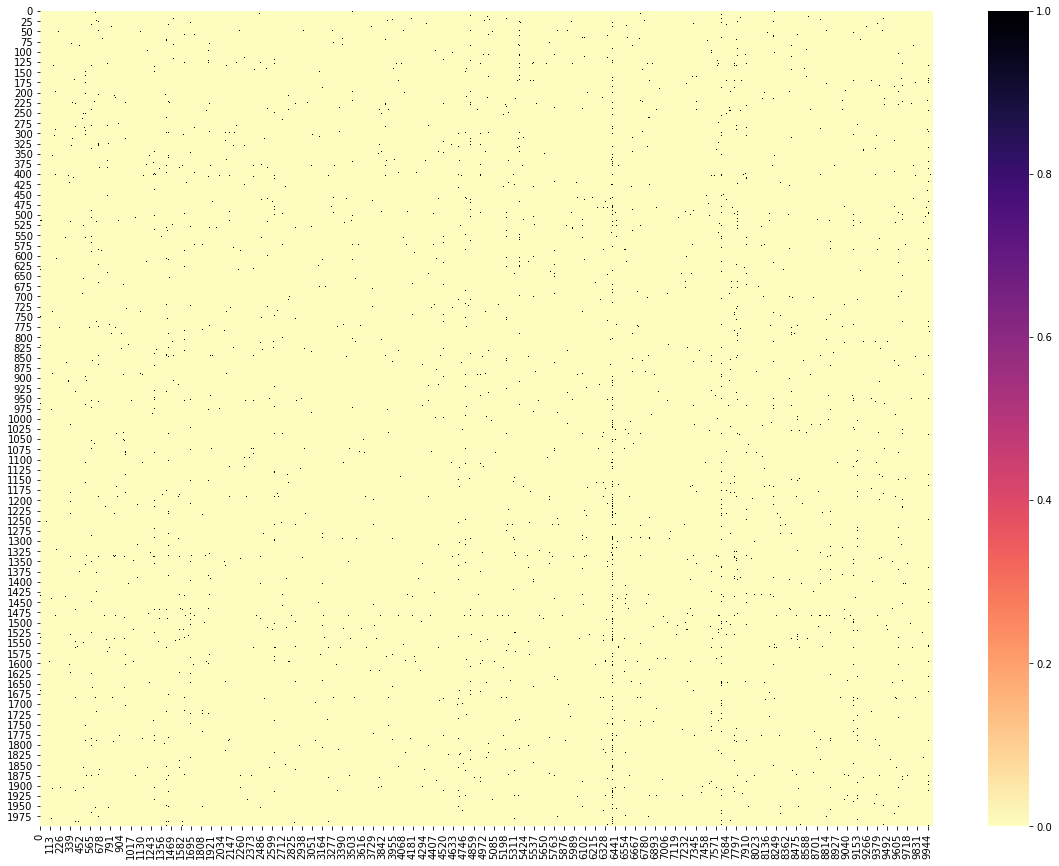

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(count_word2[0:2000,0:10000], vmin=0, vmax=1,cmap='magma_r')